# Analiza besedila na mojedelo.com

Avtor: Alja Dostal

Najprej prenesemo podatke iz interneta in jih obdelamo, ter jih shranimo v csv format

In [14]:
import shrani
import obdelaj

shrani.save_web_data()
obdelaj.parse_data_to_csv()

Stevilo vseh sluzb 403


## Prikaz vhodnih podatkov

In [3]:
import pandas as pd

pd.set_option('display.min_rows', 10)

%matplotlib inline

sluzbe = pd.read_csv('obdelani/sluzbe.csv', index_col='ime')

In [32]:
sluzbe

,delodajalec,opis,kategorija,regija
ime,,,,
Strokovni sodelavec v zakladništvu,Banka Sparkasse d.d.,Opis dela: izvajanje poslov denarnega trga iz...,bancnistvo-finance,osrednjeslovenska
Sodelavec produktnega vodenja,PharmaLinea d.o.o.,Ekipa je naša glavna prednost zato neprestano...,bancnistvo-finance,osrednjeslovenska
Analitik za tržna tveganja,GEN-I d.o.o.,Te zanima področje obvladovanja tveganj v ener...,bancnistvo-finance,osrednjeslovenska
Samostojni upravljalec kreditnih tveganj,NLB d.d.,Zaradi pretekle in načrtovane rasti iščemo dva...,bancnistvo-finance,osrednjeslovenska
Upravljalec kreditnih tveganj - svetovalec,NLB d.d.,Zaradi pretekle in načrtovane rasti iščemo izk...,bancnistvo-finance,osrednjeslovenska
...,...,...,...,...
Vodja poprodaje,Manpower d.o.o.,Za našega naročnika priznano podjetje ki del...,upravljanje-svetovanje-vodenje,gorenjska
Vodja poslovne enote čistilcev,Celovite storitve d.o.o.,vne naloge: Organiziranje vodenje in nadzor s...,upravljanje-svetovanje-vodenje,gorenjska
Vodja poslovnega razvoja za tujino,Biotera d.o.o.,Opis: analiza trga in aktivno iskanje novih po...,upravljanje-svetovanje-vodenje,gorenjska


In [1]:
import matplotlib.pyplot as plt

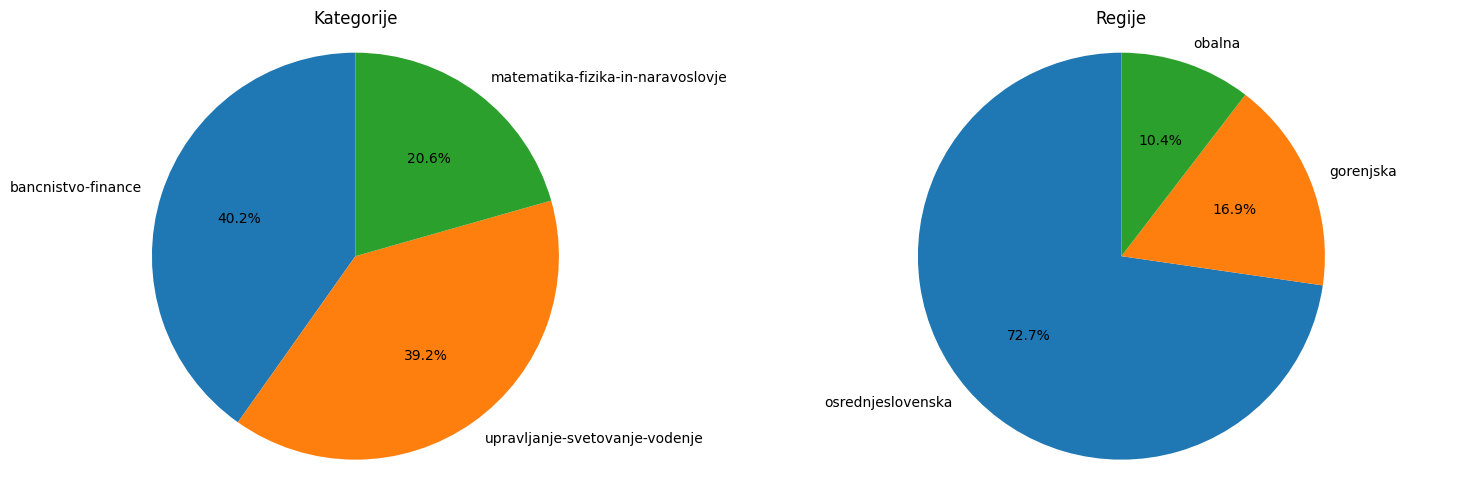

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sluzbe['kategorija'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax1)
ax1.set_title('Kategorije')
ax1.axis('equal')

sluzbe['regija'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax2)
ax2.set_title('Regije')
ax2.axis('equal')

ax1.set_ylabel('')
ax2.set_ylabel('')
plt.tight_layout()

plt.show()

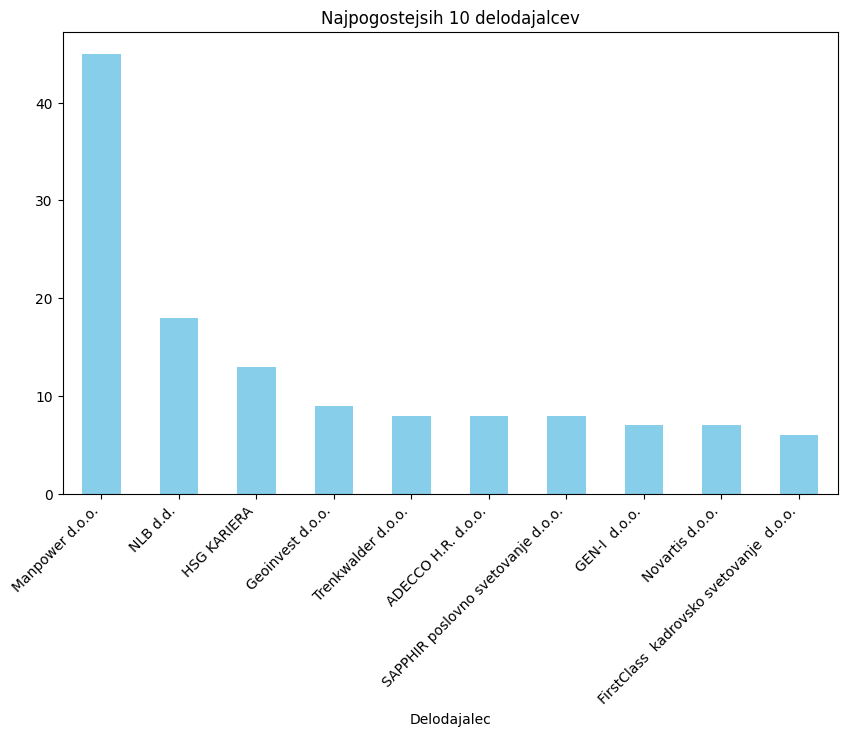

In [17]:
top_delodajalec = sluzbe['delodajalec'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_delodajalec.plot(kind='bar', color='skyblue')
plt.title('Najpogostejsih 10 delodajalcev')
plt.xlabel('Delodajalec')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
besede = {}

for index, sluzba in sluzbe.iterrows():
    opis = sluzba["opis"].replace("?", "").replace("!", "").replace(".", "")
    
    for beseda in opis.split(" "):
        if len(beseda) <= 3:
            continue
        
        if beseda in besede:
            besede[beseda] += 1
        else:
            besede[beseda] = 1

besede_pari = []
for beseda, n in besede.items():
    besede_pari.append((-n, beseda))
besede_pari.sort()

besede_pari_urejeno = []
for n, beseda in besede_pari:
    besede_pari_urejeno.append((beseda, -n))

besede_pari_urejeno[:10]

[('podjetje', 87),
 ('iščemo', 84),
 ('delovno', 73),
 ('delo', 71),
 ('mesto', 67),
 ('naročnika', 52),
 ('mednarodno', 48),
 ('našega', 46),
 ('vabimo', 45),
 ('področju', 44)]

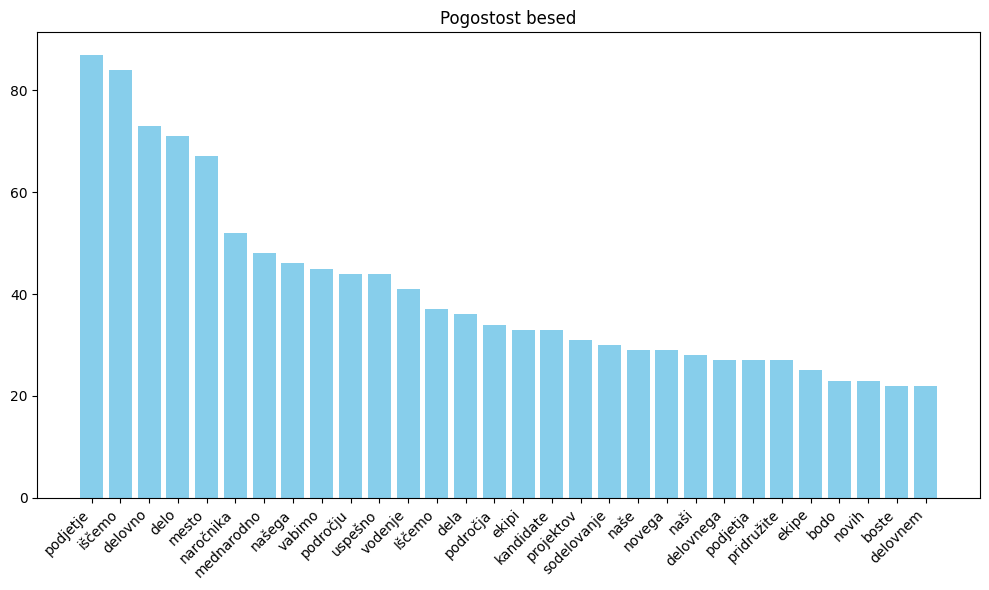

In [53]:
besede = []
ponovitve = []
for beseda, ponovitev in besede_pari_urejeno[:30]:
    besede.append(beseda)
    ponovitve.append(ponovitev)

plt.figure(figsize=(10, 6))
plt.bar(besede, ponovitve, color='skyblue')
plt.xlabel('')
plt.ylabel('')
plt.title('Pogostost besed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()